Please upload your image file (e.g., lena.png):


Saving Lena.png to Lena.png


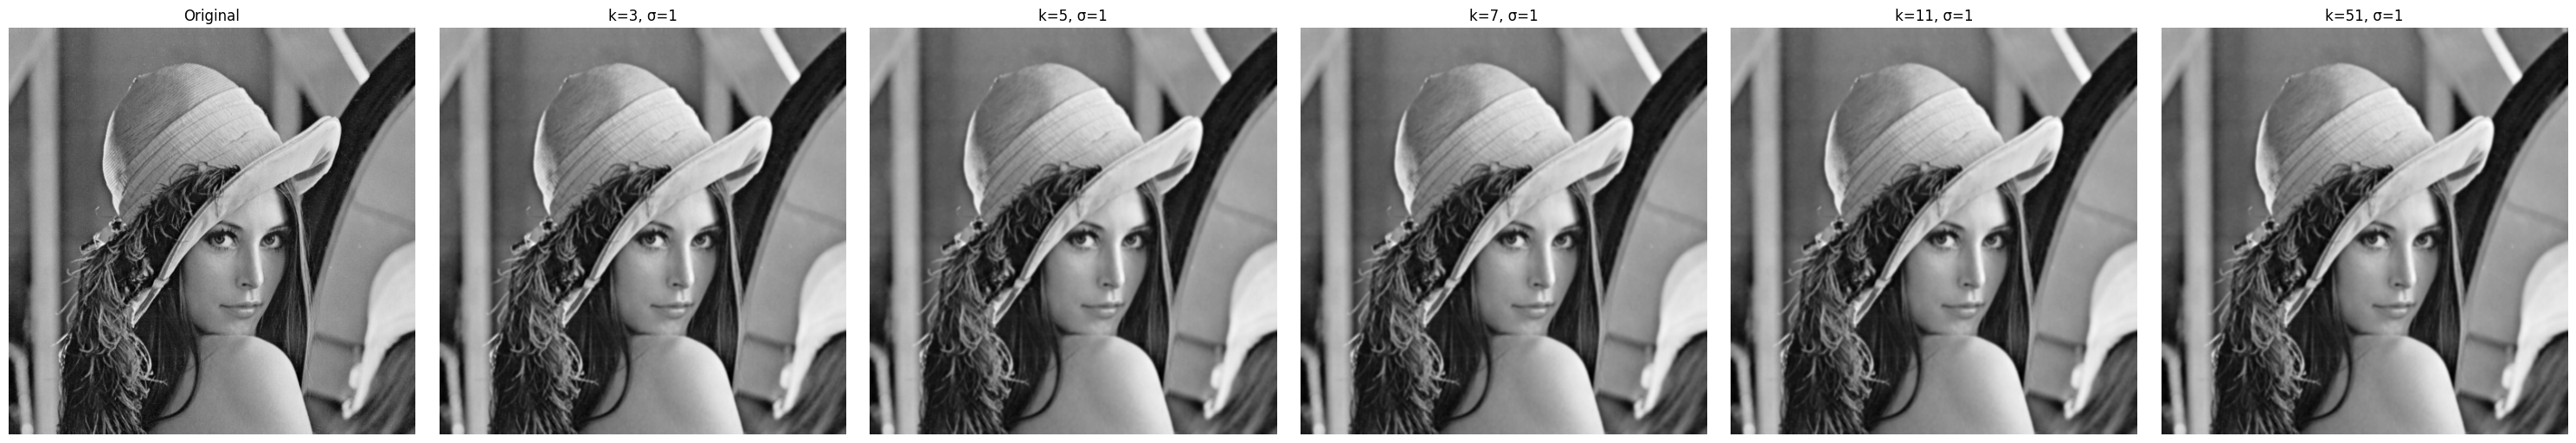

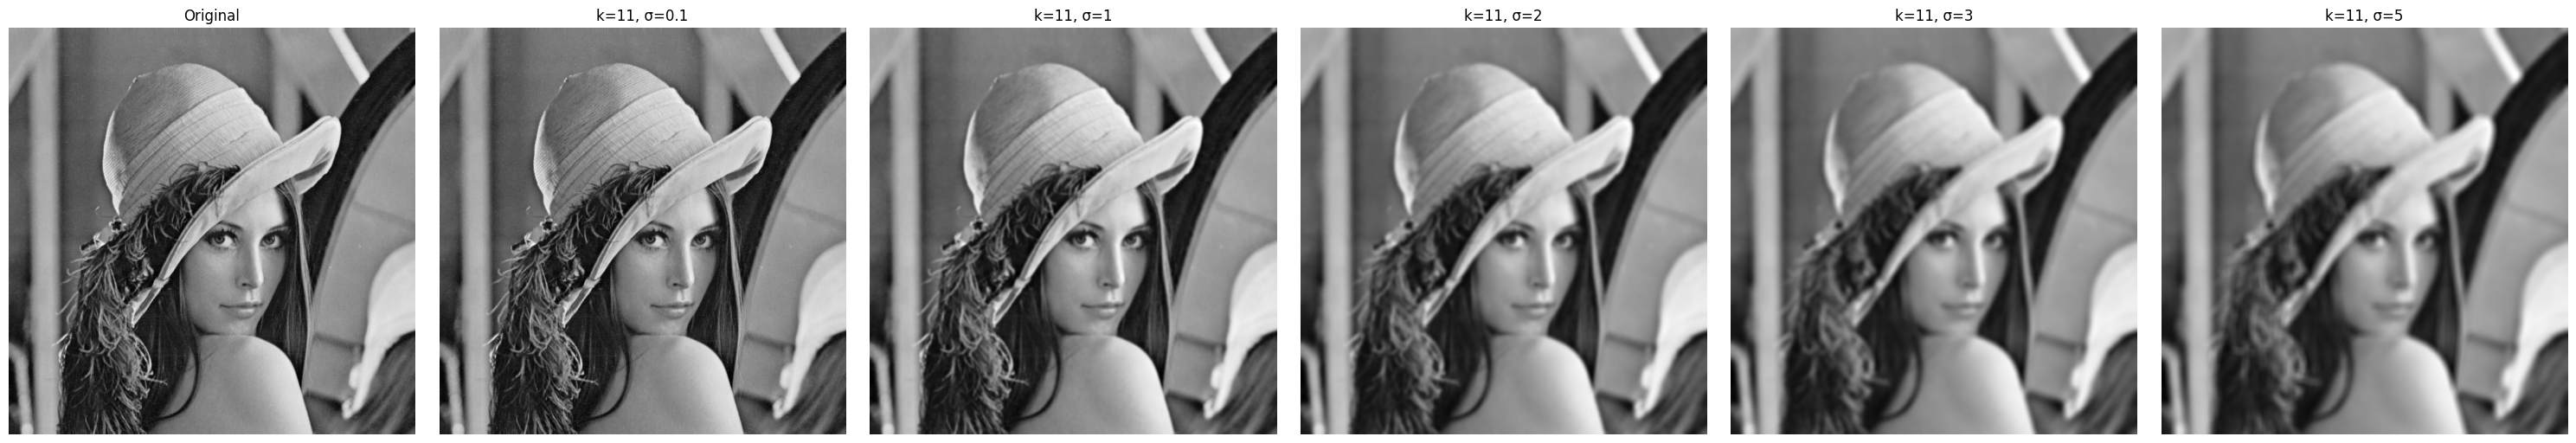

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from google.colab import files
from io import BytesIO

#creating a 2D Gaussian kernel
def gaussian_kernel(size, sigma):
    kernel = np.fromfunction(
        lambda x, y: (1/ (2*np.pi*sigma**2)) *
                     np.exp(-((x-(size-1)/2)**2 + (y-(size-1)/2)**2) / (2*sigma**2)),
        (size, size)
    )
    return kernel / np.sum(kernel)

#applying gaussian smoothing to an image
def myGaussianSmoothing(I, k, s):
    #creating the gaussian kernel
    kernel = gaussian_kernel(k, s)

    #padding the image
    pad = k // 2
    padded_img = np.pad(I, ((pad, pad), (pad, pad)), mode='edge')

    #applying convolution
    smoothed = np.zeros_like(I)
    for i in range(I.shape[0]):
        for j in range(I.shape[1]):
            smoothed[i, j] = np.sum(padded_img[i:i+k, j:j+k] * kernel)

    return smoothed

def upload_and_load_image():
    uploaded = files.upload()
    file_name = next(iter(uploaded))
    img = Image.open(BytesIO(uploaded[file_name])).convert('L')
    return np.array(img).astype(float) / 255.0

def display_images(images, titles):
    n = len(images)
    fig, axes = plt.subplots(1, n, figsize=(5*n, 5))
    if n == 1:
        axes = [axes]
    for ax, img, title in zip(axes, images, titles):
        ax.imshow(img, cmap='gray')
        ax.set_title(title)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

print("Please upload your image file (e.g., lena.png):")
image = upload_and_load_image()

#testing with different kernel sizes
kernel_sizes = [3, 5, 7, 11, 51]
sigma = 1
smoothed_images_k = [myGaussianSmoothing(image, k, sigma) for k in kernel_sizes]
display_images([image] + smoothed_images_k,
               ['Original'] + [f'k={k}, σ=1' for k in kernel_sizes])

#testing with different sigma values
sigmas = [0.1, 1, 2, 3, 5]
kernel_size = 11
smoothed_images_s = [myGaussianSmoothing(image, kernel_size, s) for s in sigmas]
display_images([image] + smoothed_images_s,
               ['Original'] + [f'k=11, σ={s}' for s in sigmas])